In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, average_precision_score


In [18]:
# Load the uploaded CSV files
accuracies_path = 'accuracies.csv'
losses_path = 'losses.csv'
predictions_path = 'predictions.csv'
true_data_path = '../data/vertical_data.csv'

# Read the files into pandas DataFrames
accuracies_df = pd.read_csv(accuracies_path)
losses_df = pd.read_csv(losses_path)
predictions_df = pd.read_csv(predictions_path)
last_row_df = predictions_df.tail(1).squeeze().reset_index(drop=True)
true_data_df = pd.read_csv(true_data_path)
assert len(true_data_df) == len(last_row_df), "Lengths of true_data_df and last_row_df are not equal"

In [19]:
# Example true labels and predictions (binary classification)
true_data = true_data_df['y']  # True labels
predictions = last_row_df  # Predicted probabilities

In [20]:
# Calculate accuracy
accuracy = accuracy_score(true_data, [1 if p > 0.5 else 0 for p in predictions])
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 33.33%


In [21]:
# Calculate class-wise accuracy
for class_label in np.unique(true_data):
    class_indices = np.where(true_data == class_label)[0]
    class_accuracy = accuracy_score(true_data[class_indices], predictions[class_indices])
    print(f"Accuracy for class {class_label}: {class_accuracy}")

Accuracy for class 0.0: 0.0
Accuracy for class 1.0: 0.0
Accuracy for class 2.0: 1.0


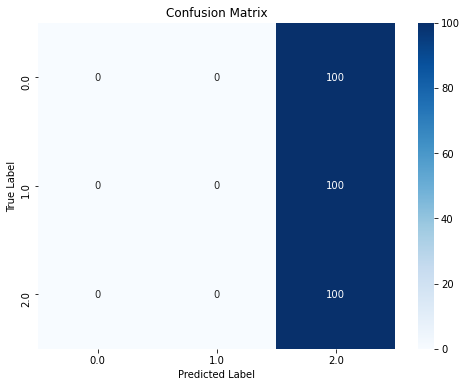

In [22]:
# Calculate confusion matrix
cm = confusion_matrix(true_data, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(true_data), yticklabels=np.unique(true_data))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Explanation: A confusion matrix visualizes the performance of a classification model by showing the counts of true positives, true negatives, false positives, and false negatives for each class.

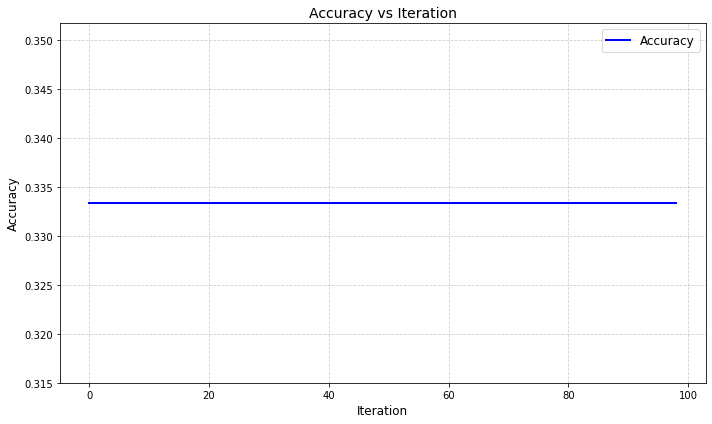

In [23]:
# Plotting the accuracy values against iterations
plt.figure(figsize=(10, 6))
plt.plot( accuracies_df.iloc[:, 0], label='Accuracy', color='blue', linewidth=2)
plt.title('Accuracy vs Iteration', fontsize=14)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

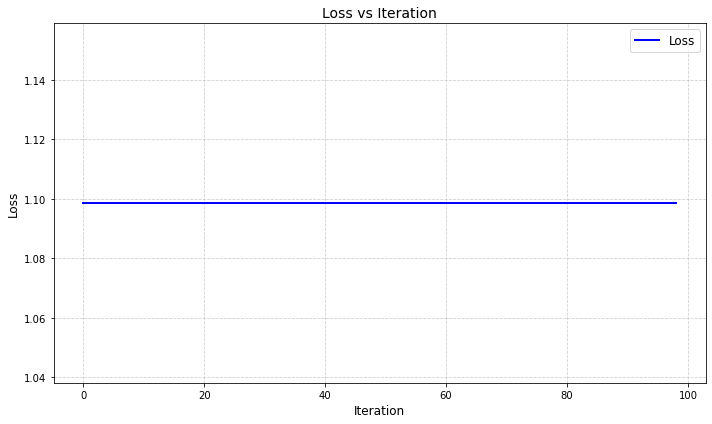

In [24]:
# Plotting the accuracy values against iterations
plt.figure(figsize=(10, 6))
plt.plot( losses_df.iloc[:, 0], label='Loss', color='blue', linewidth=2)
plt.title('Loss vs Iteration', fontsize=14)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()